In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# Simulate 1,000 users
n = 1000
data = pd.DataFrame({
    "age": np.random.randint(20, 60, n),
    "deposit_amount": np.random.normal(5000, 2000, n),
    "monthly_trades": np.random.poisson(5, n)
})

data.head()

,age,deposit_amount,monthly_trades
0,58,3745.162231,8
1,48,4009.221514,3
2,34,5837.678828,6
3,27,4221.423617,5
4,40,2530.111213,3


In [3]:
# Scale the data
# K-Means uses distance (euclidean) to cluster, so we need to scale the features
# if deposit_amount is in the range of thousands and monthly_trades is in the range of single digits, K-Means will be biased towards deposit_amount

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [ ]:
# Apply K-Means clustering
# Clusters users into 3 segments based on their age, deposit amount, and monthly trades
kmeans = KMeans(n_clusters=3, random_state=42)
data["cluster"] = kmeans.fit_predict(scaled_data)

data.head()

,age,deposit_amount,monthly_trades,cluster
0,58,3745.162231,8,2
1,48,4009.221514,3,0
2,34,5837.678828,6,1
3,27,4221.423617,5,1
4,40,2530.111213,3,2


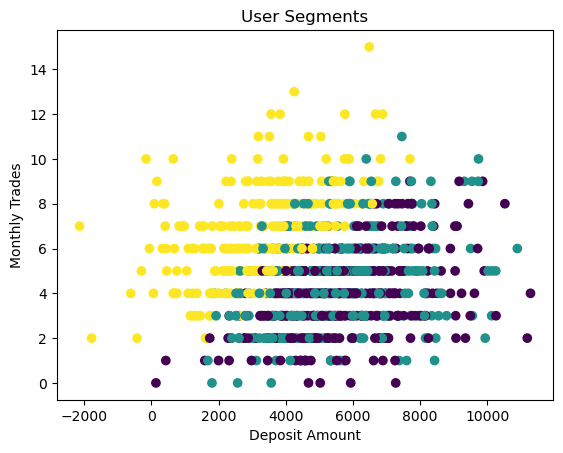

In [5]:
# Visualize Clusters
plt.figure()
plt.scatter(data["deposit_amount"], data["monthly_trades"], c=data["cluster"])
plt.xlabel("Deposit Amount")
plt.ylabel("Monthly Trades")
plt.title("User Segments")
plt.show()

Business Interpretation

Cluster 0:

Low deposits

Low trading frequency
→ Potential churn risk users

Cluster 1:

Medium deposits

Medium trading
→ Core active users

Cluster 2:

High deposits

High trading
→ High-value VIP clients

In [6]:
# Average per cluster
data.groupby("cluster").mean()

,age,deposit_amount,monthly_trades
cluster,,,
0,49.791444,5687.782518,3.991979
1,27.958217,5701.463920,4.682451
2,42.441948,3175.775572,6.715356
